<a href="https://colab.research.google.com/github/TyaraKusumaNevada/PCVK_Genap_2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS PRAKTIKUM 5**

1. GAMMA CORRECT

 Gamma Correction pada citra 
---
Masukkan nilai Gamma: 3


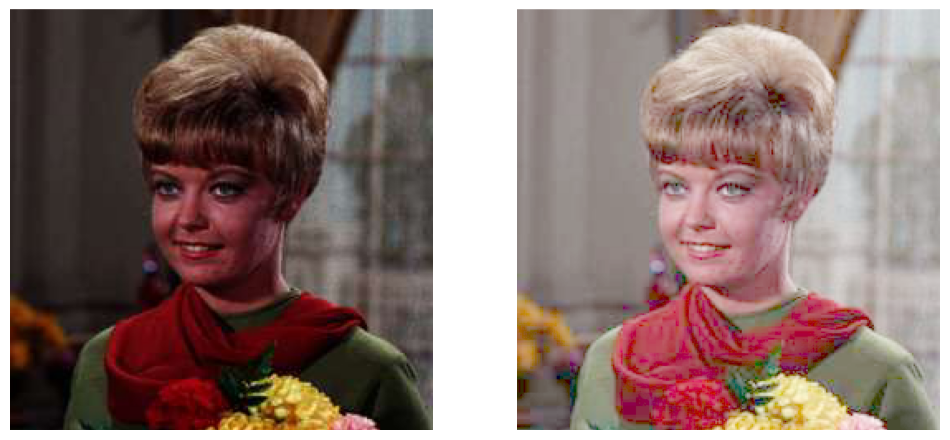

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print(' Gamma Correction pada citra ')
print('---')
try:
    gamma = float(input('Masukkan nilai Gamma: '))  # Meminta input nilai gamma dari user
except ValueError:
    print('Error, not a number')



# Load Gambar
img = cv.imread('/content/female.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB

# Normalisasi pixel
img_normalized = img / 255.0

# Apply gamma correction
gamma_corrected = np.power(img_normalized, 1/gamma)  # Rumus gamma correction

# Konversi kembali ke range [0,255]
gamma_corrected = np.uint8(gamma_corrected * 255)

# Menampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gamma_corrected)
plt.axis('off')
plt.show()

2. SIMULASI IMAGE DEPTH

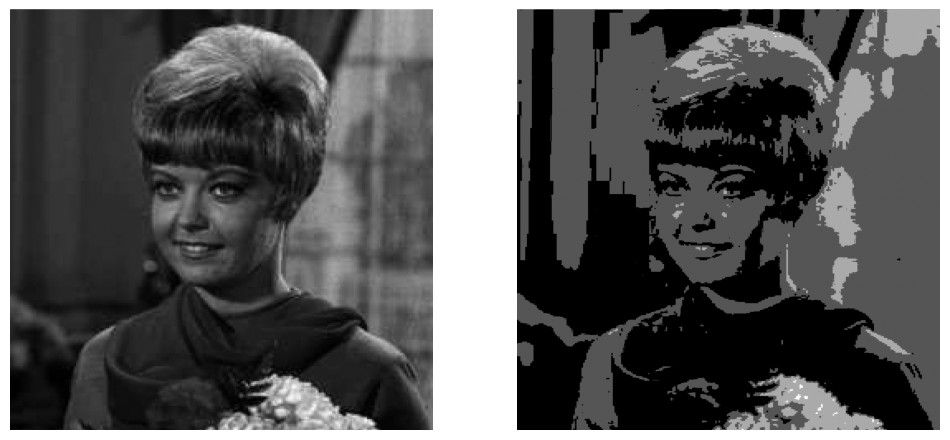

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
original = cv.imread('/content/female.png', cv.IMREAD_GRAYSCALE)

bit_depth = 2  # Nilai bit depth yang dipilih
level = 255 / (pow(2, bit_depth) - 1)

# Membuat array kosong dengan ukuran sama seperti gambar asli
depth_image = np.zeros(original.shape, original.dtype)

# Proses kuantisasi
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # Kuantisasi nilai pixel
        depth_image[i,j] = round(original[i,j] / level) * level

# Menampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(depth_image, cmap='gray')
plt.axis('off')
plt.show()

3. AVERAGE DENOISING

## 1. Import Library dan Definisi Fungsi PSNR

In [4]:
#1. Import Library dan Definisi Fungsi PSNR
import cv2 as cv
import numpy as np
import glob
from math import log10, sqrt
import matplotlib.pyplot as plt

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)  # Menghitung Mean Squared Error
    if mse == 0:
        return 100  # Jika MSE = 0, maka PSNR dianggap tak hingga
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))  # Rumus PSNR
    return psnr


**4. IMAGE MASKING**

Ukuran gambar: 738 x 781


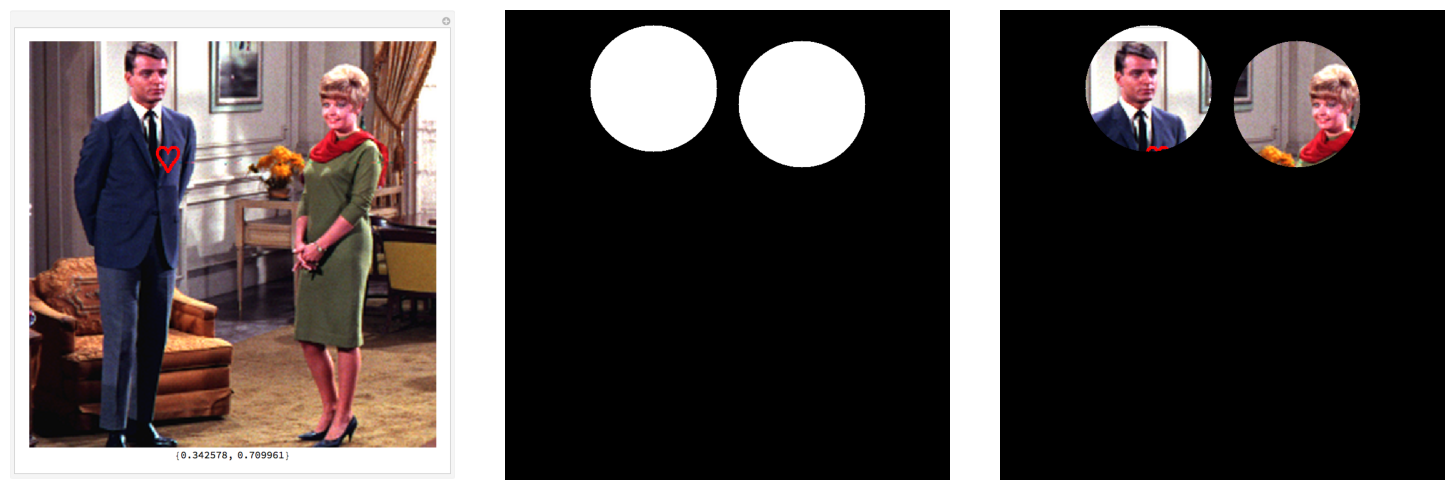

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv.imread('/content/couple.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membuat mask dengan 2 lingkaran putih di bagian atas (seperti mata)
mask = np.zeros(img.shape[:2], dtype=np.uint8)
height, width = img.shape[:2]

print(f"Ukuran gambar: {width} x {height}")

# Menyesuaikan posisi lingkaran agar tepat di wajah
# Lingkaran kiri (untuk wajah kiri)
center_left = (width // 3, height // 6)  # Posisi lebih ke bawah untuk wajah
radius = min(width, height) // 7  # Ukuran lingkaran lebih kecil

cv.circle(mask, center_left, radius, 255, -1)

# Lingkaran kanan (untuk wajah kanan)
center_right = (2 * width // 3, height // 5)  # Posisi lebih ke bawah untuk wajah
cv.circle(mask, center_right, radius, 255, -1)

# Apply masking dengan operator AND
masked_img = cv.bitwise_and(img, img, mask=mask)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(masked_img)
plt.axis('off')

plt.tight_layout()
plt.show()

**5. OPERATOR LOGIKA LAINNYA**


No. 1. OPERATOR: NOT (Komplement)
--------------------------------------------------


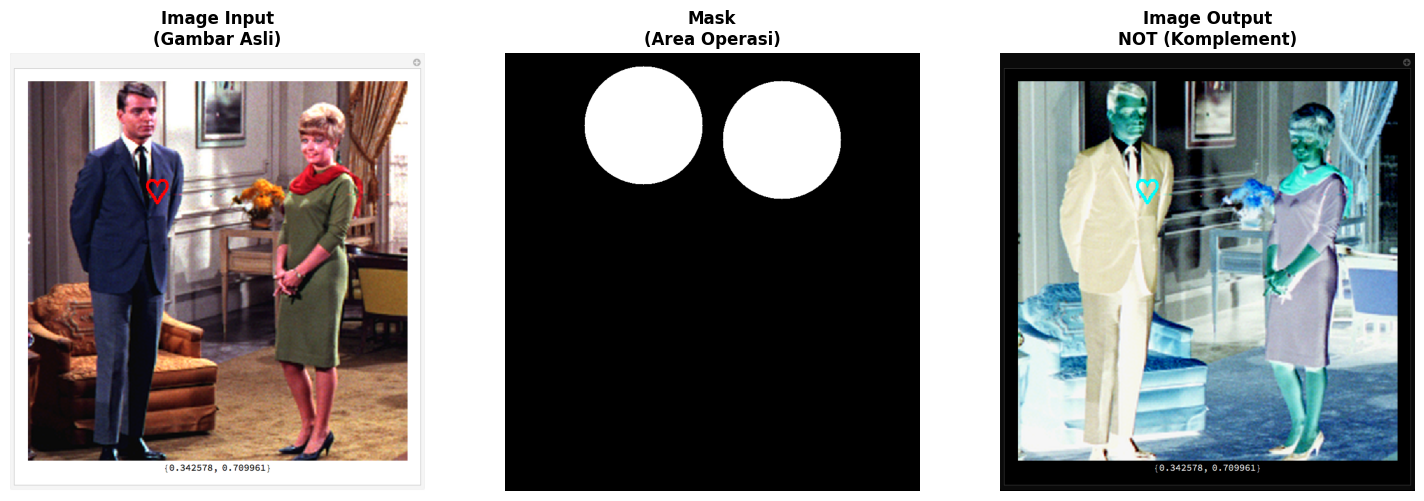


No. 2. OPERATOR: OR (Atau)
--------------------------------------------------


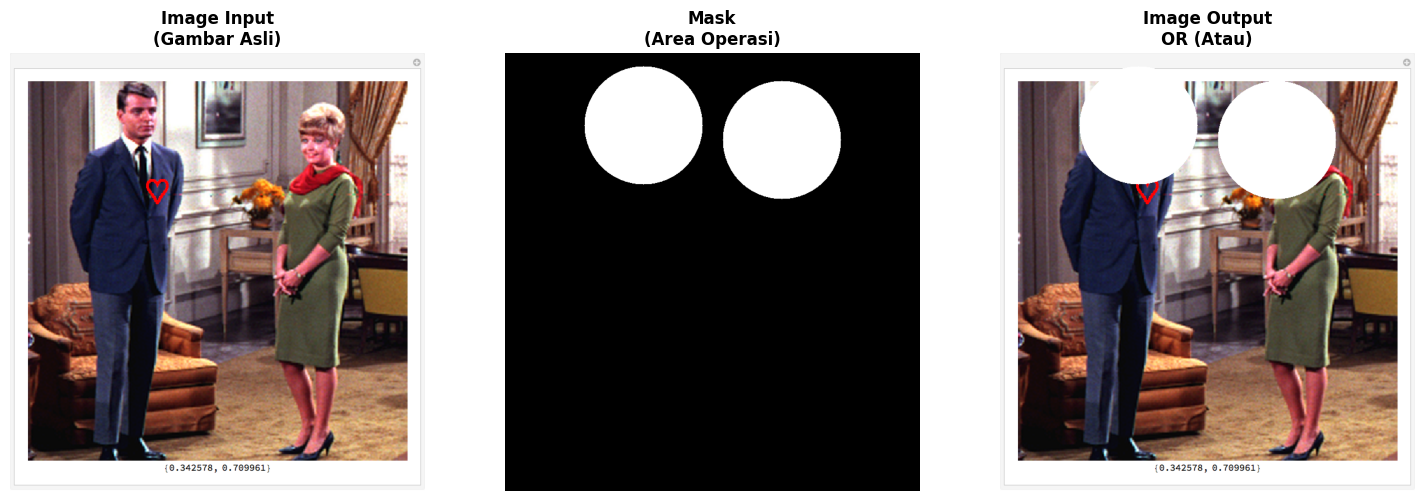


No. 3. OPERATOR: AND (Dan)
--------------------------------------------------


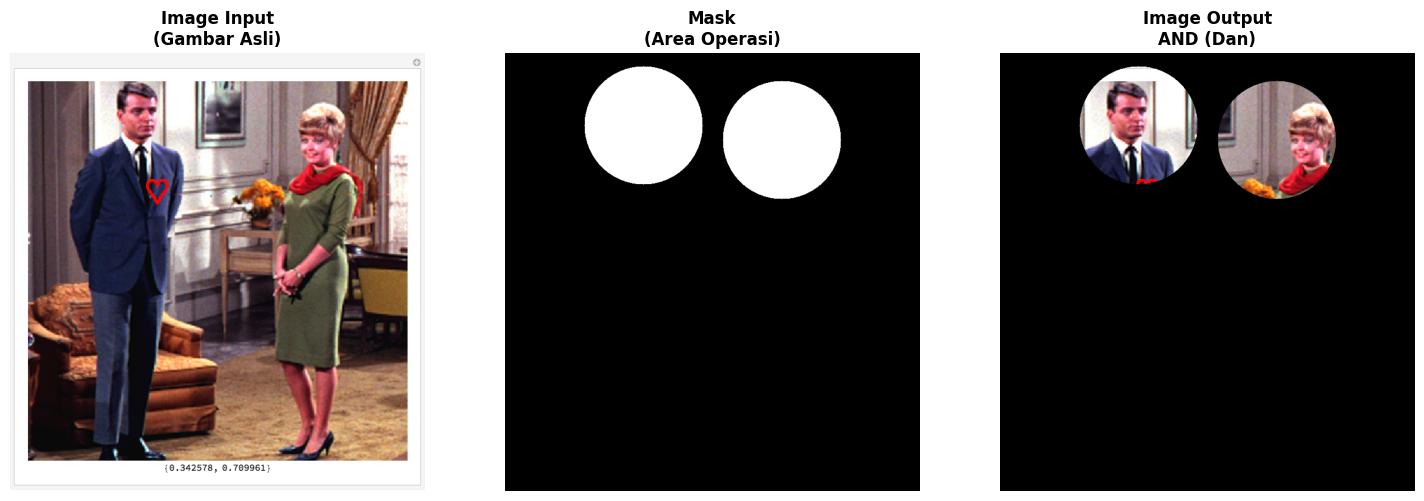


No. 4. OPERATOR: NAND (Not AND)
--------------------------------------------------


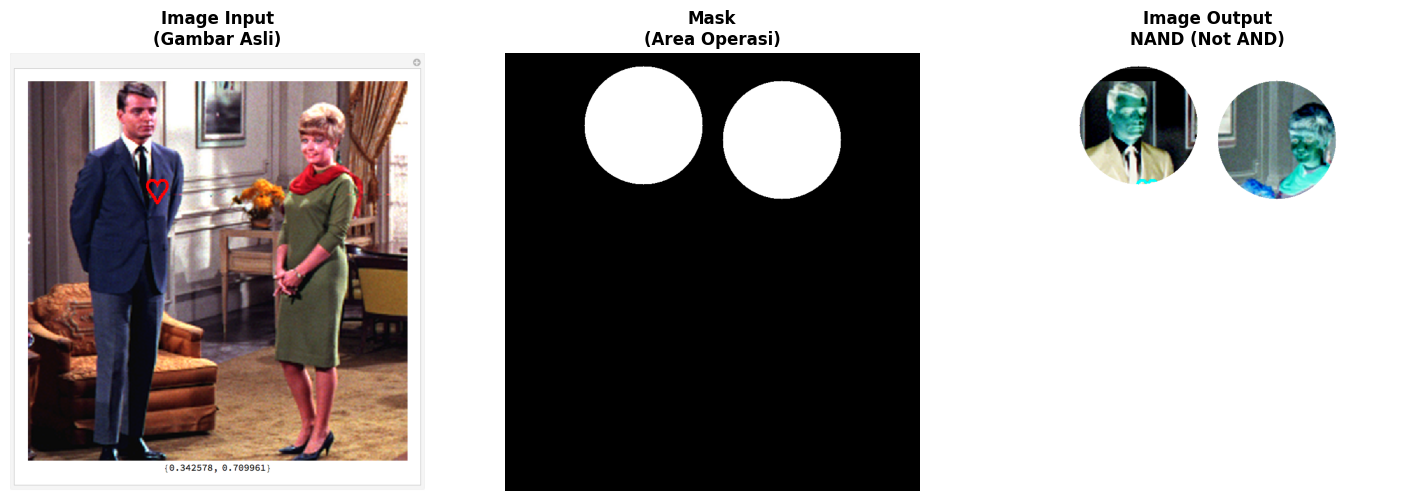


No. 5. OPERATOR: XOR (Exclusive OR)
--------------------------------------------------


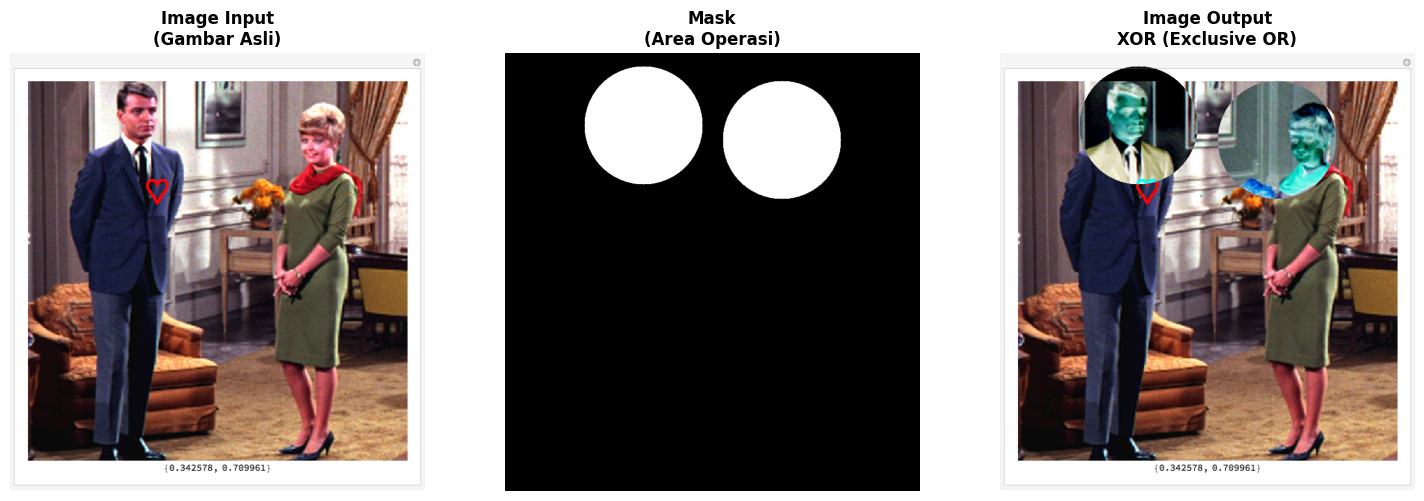


ANALISA DETAIL HASIL OPERATOR LOGIKA
• NOT (Komplement)   : Menghasilkan gambar negatif dengan membalik semua nilai pixel (0 jadi 255, 255 jadi 0)
• OR (Atau)          : Menggabungkan area terang dari gambar asli dan mask, menghasilkan gambar yang lebih terang
• AND (Dan)          : Hanya menampilkan area gambar yang beririsan dengan area putih pada mask
• NAND (Not AND)     : Kebalikan dari AND, menampilkan semua area kecuali yang beririsan dengan mask
• XOR (Exclusive OR) : Menampilkan area yang hanya ada di gambar ATAU hanya di mask, tidak keduanya

KESIMPULAN:
Operator logika pada pengolahan citra bekerja berdasarkan operasi himpunan dimana
setiap pixel diproses berdasarkan nilai biner (0/1). Hasil yang berbeda tergantung
pada bagaimana operator menggabungkan informasi dari gambar asli dan mask.


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv.imread('/content/couple.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membuat mask dengan 2 lingkaran putih
mask = np.zeros(img.shape[:2], dtype=np.uint8)
height, width = img.shape[:2]

center_left = (width // 3, height // 6)
center_right = (2 * width // 3, height // 5)
radius = min(width, height) // 7

cv.circle(mask, center_left, radius, 255, -1)
cv.circle(mask, center_right, radius, 255, -1)

# Konversi mask ke 3 channel untuk operasi dengan gambar berwarna
mask_3channel = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

# OPERATOR LOGIKA
results = []

# 1. NOT (Komplement)
not_result = cv.bitwise_not(img)
results.append(('NOT (Komplement)', not_result))

# 2. OR (Atau)
or_result = cv.bitwise_or(img, mask_3channel)
results.append(('OR (Atau)', or_result))

# 3. AND (Dan)
and_result = cv.bitwise_and(img, img, mask=mask)
results.append(('AND (Dan)', and_result))

# 4. NAND (Not AND)
nand_result = cv.bitwise_not(and_result)
results.append(('NAND (Not AND)', nand_result))

# 5. XOR (Exclusive OR)
xor_result = cv.bitwise_xor(img, mask_3channel)
results.append(('XOR (Exclusive OR)', xor_result))


# Tampilkan per operator dengan layout yang jelas
for i, (operator_name, result_img) in enumerate(results, 1):
    print(f"\nNo. {i}. OPERATOR: {operator_name}")
    print("-" * 50)

    plt.figure(figsize=(15, 5))

    # Image Input
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Image Input\n(Gambar Asli)', fontsize=12, fontweight='bold')
    plt.axis('off')

    # Mask (untuk referensi)
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask\n(Area Operasi)', fontsize=12, fontweight='bold')
    plt.axis('off')

    # Image Output
    plt.subplot(1, 3, 3)
    plt.imshow(result_img)
    plt.title(f'Image Output\n{operator_name}', fontsize=12, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# ANALISA DETAIL
print("\n" + "=" * 100)
print("ANALISA DETAIL HASIL OPERATOR LOGIKA")
print("=" * 100)

analyses = [
    "NOT (Komplement)   : Menghasilkan gambar negatif dengan membalik semua nilai pixel (0 jadi 255, 255 jadi 0)",
    "OR (Atau)          : Menggabungkan area terang dari gambar asli dan mask, menghasilkan gambar yang lebih terang",
    "AND (Dan)          : Hanya menampilkan area gambar yang beririsan dengan area putih pada mask",
    "NAND (Not AND)     : Kebalikan dari AND, menampilkan semua area kecuali yang beririsan dengan mask",
    "XOR (Exclusive OR) : Menampilkan area yang hanya ada di gambar ATAU hanya di mask, tidak keduanya"
]

for analysis in analyses:
    print(f"• {analysis}")

print("\nKESIMPULAN:")
print("Operator logika pada pengolahan citra bekerja berdasarkan operasi himpunan dimana")
print("setiap pixel diproses berdasarkan nilai biner (0/1). Hasil yang berbeda tergantung")
print("pada bagaimana operator menggabungkan informasi dari gambar asli dan mask.")